<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Николай! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что у нас получилось!</b></font>

**Вступление**

**Проект:** анализ успешности компьютерных игр для планирования рекламных кампаний в интернет-магазине "Стримчик"

**Описание проекта:** проект направлен на анализ данных о продажах компьютерных игр, оценок пользователей и критиков, жанров и платформ. Цель - выявить закономерности, которые помогут спрогнозировать успешность новых игр и оптимизировать маркетинговые стратегии на 2017 год.

**Цель проекта:** определить факторы, влияющие на успешность компьютерных игр, чтобы выбрать наиболее перспективные продукты и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от ассоциации ESRB.

**План работы:**

1. Подготовка данных: привести данные к нужным форматам, обработать пропуски и некорректные значения.
2. Исследовательский анализ данных: проанализировать динамику продаж по платформам и годам, выявить тренды.
3. Построить профиль пользователя для разных регионов (Северная Америка, Европа, Япония).
4. Проверить гипотезы: анализ различий в пользовательских оценках для разных платформ и жанров.
5. Сформировать выводы и рекомендации для будущих рекламных кампаний.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import binom, norm

## Загрузка данных

In [2]:
# Отобразим первые строки датафрейма
games_data = pd.read_csv('games/games.csv')
print('Общая информация о данных:')
display(games_data.info())
print('Первые 5 строк датасета:')
display(games_data.head())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Первые 5 строк датасета:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Общая информация о данных:

- Всего записей: 16,715
- Всего столбцов: 11

**Столбцы:**

1. Name — Название игры (16,713 непустых значений).
2. Platform — Платформа (все 16,715 значений заполнены).
3. Year_of_Release — Год выпуска (16,446 заполненных значений, тип данных — float64).
4. Genre — Жанр игры (16,713 заполненных значений).
5. NA_sales — Продажи в Северной Америке (все значения заполнены, тип данных — float64).
6. EU_sales — Продажи в Европе (все значения заполнены).
7. JP_sales — Продажи в Японии (все значения заполнены).
8. Other_sales — Продажи в других странах (все значения заполнены).
9. Critic_Score — Оценка критиков (8,137 заполненных значений, тип данных — float64).
10. User_Score — Оценка пользователей (10,014 заполненных значений, тип данных — object).
11. Rating — Рейтинг ESRB (9,949 заполненных значений, тип данных — object).

Некоторые столбцы имеют пропуски, например, Year_of_Release, Critic_Score, User_Score, и Rating. Также, оценки пользователей находятся в текстовом формате (object), что потребует обработки.

### Проверка дубликатов

In [3]:
# Проверим датасет на явные дубликаты
print(f"Количество явных дубликатов: {games_data.duplicated().sum()}")

Количество явных дубликатов: 0


In [4]:
# Проверим датасет на неявные дубликаты по комбинации 'name', 'platform', 'year_of_release'
implicit_duplicates = games_data[games_data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

# Выведем неявные дубликаты для анализа
display(implicit_duplicates)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


На мой взгляд, данные дубликаты вызваны попыткой дважды записать данные о продажах.
В случае с пустым именем, предлагаю оставить эти строки, т.к. присутствуют суммы продаж. Продажи - суммировать.
Да, я понимаю, что тут всего 4 строки и влияние на результаты анализа невелико, однако выбираю тщательно обрабатывать все случаи.

В данном примере, обработаю строки вручную:

In [5]:
# Для строк с дубликатами по игре 'Madden NFL 13' на PS3 (индексы 604 и 16230), суммируем продажи
games_data.loc[604, ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']] += games_data.loc[16230, ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']]

# Для строк с дубликатами по игре на платформе GEN (индексы 659 и 14244), суммируем продажи
games_data.loc[659, ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']] += games_data.loc[14244, ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']]

# Удалим строки с дубликатами (индексы 16230 и 14244)
games_data = games_data.drop(index=[16230, 14244])

# Проверим результат
implicit_duplicates = games_data[games_data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'], keep=False)]

# Выведем неявные дубликаты для анализа
display(implicit_duplicates)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, изучили данные для предобработки.</font>

## Подготовка данных

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Просмотрел весь раздел, но не нашел проверки явных дубликатов. Если мы это сделали, но потом код удалили, то это не совсем правильно, пусть все знают, что мы тщательно анализируем данные.</font><br>
<font color='Red'>🛠 Так же не произведена проверка неявных дубликатов и не принято решение по их обработке. Данная проверка является составной частью первичного анализа данных. Проверять лучше по имени, платформе и году релиза одновременно.</font>

<font color='Blue'><b>
Добрый день, Олег! Спасибо за комментарии.
Дополнил обработку дубликатов.    
</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера 01</b></font><br>
<font color='DarkGreen'>👌 Привет! Хорошо, пошел смотреть обновленный проект.</font>

### Приведём названия столбцов к нижнему регистру

In [6]:
games_data.columns = games_data.columns.str.lower()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодец! 👍 Иногда пишут длинный словарь для замены колонок, как в проекте по музыке.</font>

### Преобразуем данные в нужные типы и обрабатываем пропуски

In [7]:
# Преобразуем years_of_release к целому типу
games_data['year_of_release'] = games_data['year_of_release'].dropna()
# Преобразуем year_of_release в целочисленный тип
games_data['year_of_release'] = pd.to_numeric(games_data['year_of_release'], errors='coerce').astype('Int64')

# Преобразуем user_score, обработаем 'tbd' как NaN
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')

Пропуски в critic_score и user_score не заполняем, так как отсутствие данных может быть релевантным.

Пропуски в rating также оставляем, посколько это отсутствие возрастного рейтинга

Устанавливаем заглушку "No Rating" для значений, где рейтинг ESRB отсутствует, чтобы сохранить эти данные в анализе.

In [8]:
# Заменим пропуски на значение 'No Rating'
games_data['rating'] = games_data['rating'].fillna('No Rating')
display(games_data['rating'].value_counts())

rating
No Rating    6765
E            3989
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: count, dtype: int64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильное решение по удалению пропусков в годах релиза.</font><br>
<font color='DarkGreen'>👌 Хорошо, что перевели тип данных по году выпуска игр. 👍</font><br>
<font color='DarkGreen'>👌 Правильно сделана замена "tbd" на NaN. Это практически аналог пропусков.</font>
<br>
<font color='DarkMagenta'>👉 Этот комментарий должен быть в ячейке Markdown, а не в ячейке кода. Это относится ко всему проекту. Проект должен иметь структуру отделяющую код от комментариев, что делаем и результатов преобразования. В ячейке кода размещаются только комментарии относящиеся непосредственно к коду: описание переменных, подаваемые параметры в функцию, описание возвращаемого значения из функции и т.п.</font>
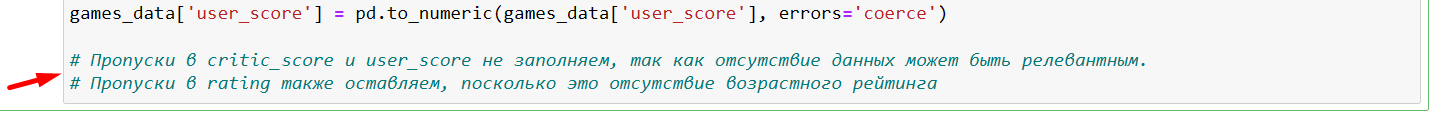

<font color='Blue'><b>
Перенёс комментарий в Markdown и обработал rating.
</b></font>

### Суммарные продажи

In [9]:
# Считаем общие продажи во всех регионах
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Выведем первые 5 строк для проверки
display(games_data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No Rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No Rating,31.38


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Молодцы, не забыли создать колонку с общими продажами. 👍 </font>

1. Заменены названия столбцов на нижний регистр, чтобы упростить работу с данными.
2. Преобразование типов:
    - Столбец year_of_release преобразовали в целое число. Пропусков около 1,6%, что немного, поэтому спокойно удалим их.
    - Столбец user_score преобразовали в числовой формат. Значение "tbd" (означает "to be determined" - "будет определено позже") преобразовали в NaN, т.к. это не числовое значение
3. Обработка пропусков:
    - Пропуски в critic_score и user_score не заполнили, т.к. игра могла не получить отзывов
    - Пропуски в rating также оставляем заменяем заглушкой "No Rating", чтобы сохранить эти данные в анализе.
4. Причины пропусков:
Пропуски в данных могут быть вызваны отсутствием информации о рецензиях или возрастных рейтингах для некоторых игр, а также отсутствием года выпуска для более редких игр.
Пропуски в Rating для Японии связаны с отсутствием необходимости маркировки ESRB.
5. Причины продажи:
Добавлен новый столбец "total_sales", который представляет собой сумму продаж по регионам NA, EU, JP, Other.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что сделаны выводы по разделу предобработки данных. 👍</font>

In [10]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во NaN 1 

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем понятное решение, всего два пропуска в колонках `name` и `genre`, да еще в этих строках пропуски по отзывам и рейтингу. Может проще удалить?</font><br>
<font color='DarkMagenta'>👉 Стоило ли оставлять пропуски года релиза? Если посмотреть на строчки с этими пропусками, то увидим, что там пропущены одновременно и рейтинг, и оценка критиков, и оценка пользователей. Пропусков около 1,6 %, можно было бы и удалить.</font><br>
<font color='DarkMagenta'>👉 Я бы порекомендовал посмотреть в инете, что означает рейтинг ESRB. И пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Что бы проанализировать ее, на пропуски следует поставить заглушку. Но может это сделаем позже? Ладно, будем смотреть дальше. </font>

<font color='DarkBlue'><b>Комментарий ревьюера: Глоссарий</b></font><br>
<font color='DarkGreen'>👌 В контексте анализа и предобработки датасета часто используютется термин: <b>Заглушка</b>. <br>Из словаря: "Заглушка — приспособление для закрывания отверстия наглухо." <br>В нашем контексте закрытие пропуска в датасете каким-то значением, совпадающим по типу с данными колонки таблицы. Как правило, для числовых данных заглушка должна быть вне диапазона значений колонки. При анализе по данной колонке заглушка или фильтруется, или включается в анализ, если сам пропуск не является ошибкой сбора данных и несет какой-то признак. <br>Частая ошибка, когда заглушке присваивается числовое значение, например `0`, а в данных колонки присутствуют символьные значения `'0'`, то при преобразовании к числовому типу произойдет слияние значимых данных таблицы и заглушки.</font>

## Исследовательский анализ данных

### Количество игр по годам

In [11]:
# games_per_year = games_data[games_data['year_of_release'] > 0].groupby('year_of_release').size()
games_per_year = games_data.groupby('year_of_release').size()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Зачем этот фильтр?</font>
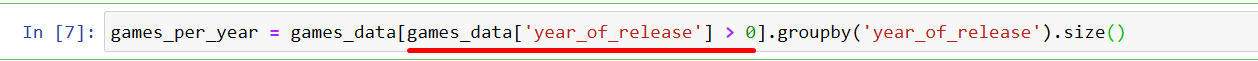

<font color='Blue'><b>
Здесь раньше была заглушка для пропусков по годам, остался артефакт, удалил.  
</b></font>

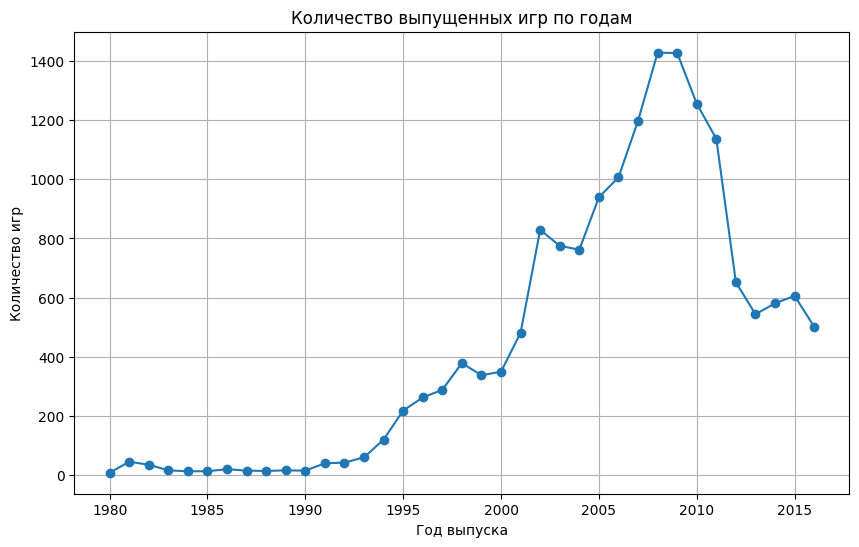

In [12]:
# Построим график количества игр по годам
plt.figure(figsize=(10,6))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Игры выпускались неравномерно, с пиком в определённые годы. Судя по графику, начиная с 2000-х годов количество выпускаемых игр резко возросло, а к 2010 годам снизилось. Это говорит о волнообразной динамике игр, которая может быть связана с разными фактами: от выхода новых консолей и повышения мощности железа до коммерциализации игр и связанного с этим творческого кризиса большинства разработчиков. Насколько мне известно, в 2000-е годы вышло множество эпохальных игр, которые стали основоположниками жанров.

**Данные не за все периоды важны для анализа:**
1. В ранние годы, до 2000-х рынок игр был ограниченным и охватывал узкую аудиторию геймеров. Эти данные не имеют той же значимости, как более поздние годы, когда рынок существенно расширился.
2. Период с 2000 по 2016 год включил в себя основной рост индустрии. Появилось множество новых платформ и игровые жанры приобрели массовую популярность.

### Продажи игр по платформам

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Обращаю внимание, что в задании необходимо определить все ли данные за все периоды важны, фильтровать данные до определения актуального периода не требуется.</font>

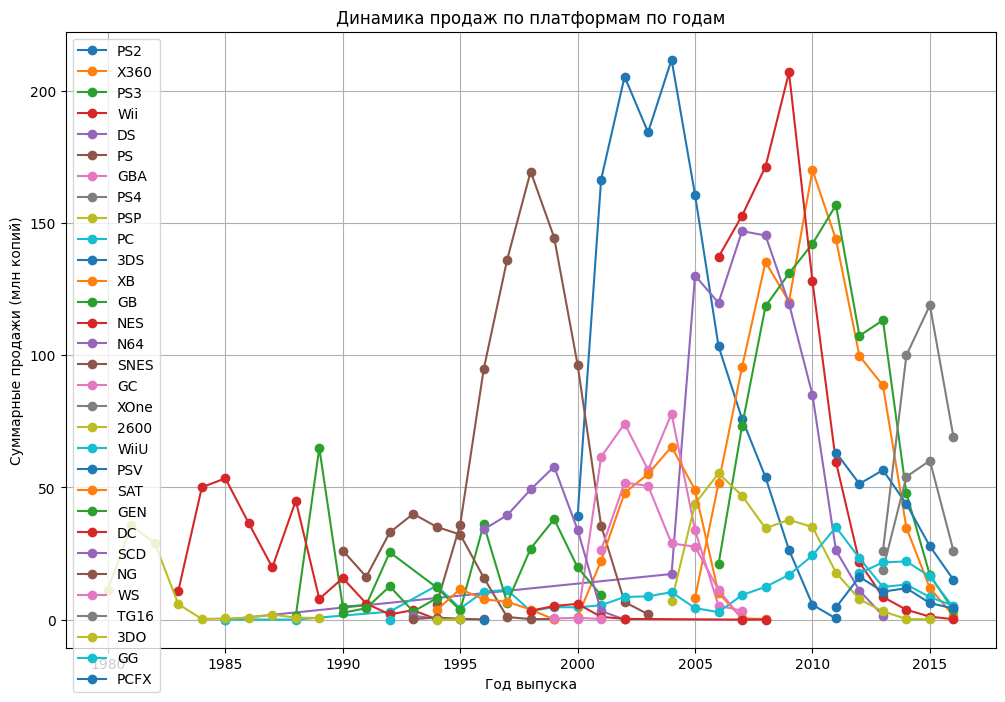

In [13]:
# Отфильтруем данные начиная с 2000 года
# games_data = games_data[games_data['year_of_release'] >= 2000]

platform_sales = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index

# Отберём топ 10 платформ с самыми высокими продажами
# top_10_platforms = platform_sales.head(10).index

# Построим распределение продаж
plt.figure(figsize=(12,8))
for platform in platform_sales:
    sales_per_year = games_data[games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)

plt.title('Динамика продаж по платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 01</b></font><br>
<font color='DarkMagenta'>👉 Что бы колонка с метками не выходила за рамки графика следует увеличить размер графика.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А можно легенду разместить в две колонки, примерно вот так:</font>

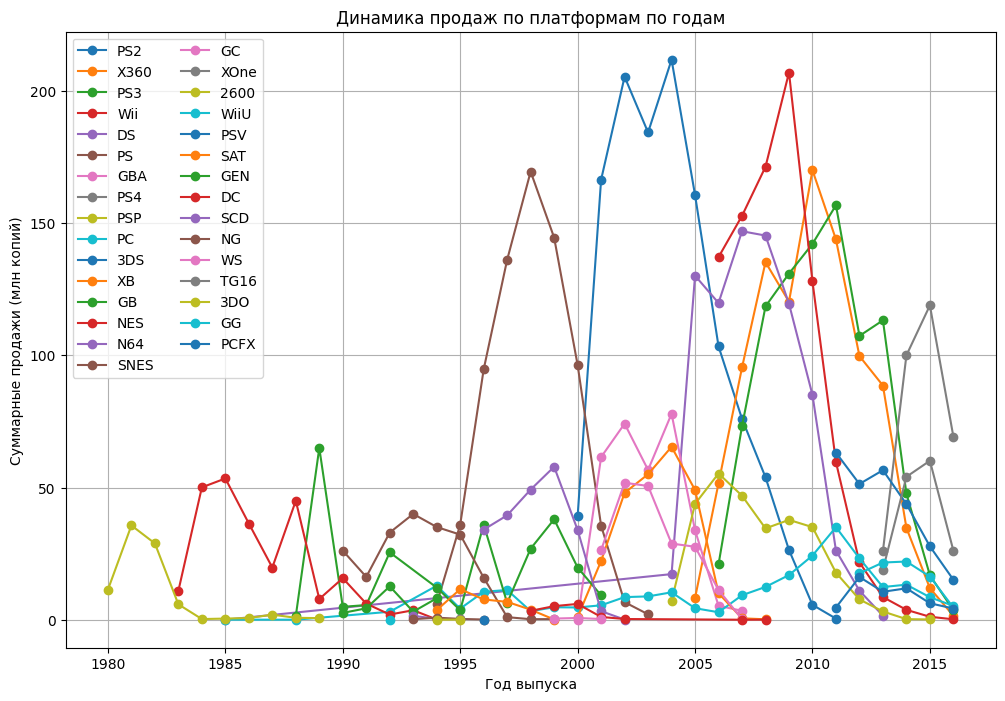

In [14]:
# Комментарий ревьюера 2
plt.figure(figsize=(12,8))
for platform in platform_sales:
    sales_per_year = games_data[games_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)

plt.title('Динамика продаж по платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2)
plt.grid(True)
plt.show()

Платформы имеют разные периоды доминирования на рынке. Например, такие платформы, как Wii и PS2, достигли своего пика и затем их продажи снизились. 

Характерный срок существования платформ составляет примерно 5-10 лет, после чего они постепенно уходят с рынка.

- PlayStation и Xbox показывают высокие продажи и стабильные позиции.
- Некоторые платформы, такие как Wii, достигли пика и затем резко упали, что свидетельствует об их уходе с рынка.
- Новые платформы, такие как PS4, демонстрируют рост и потенциальную прибыльность в 2017 году.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Как-то не корректно определять срок жизни платформы "на глазок", его расчет из данных таблицы был бы более уместен, например, как показано ниже. Вопрос брать ли платформы всего датасета, или ограничивать периодом начала роста продаж, остается открытым, но можно поэкспериментировать.</font>

In [15]:
# Комментарий ревьюера
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

np.float64(7.0)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font> <br>
<font color='Red'>🛠 Что написано в задании: <br><b>Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<br>Не учитывайте в работе данные за предыдущие годы.</b> <br>
Соответственно, необходимо сформулировать какой актуальный период выбран, создать датасет актуального периода и далее проводить исследование именно за актуальный период по этому датасету.</font><br>
<font color='Red'>🛠 Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Но и очень короткий период не подходит для прогнозирования, так что надо выбирать золотую середину (но не менее 2-х полных лет и не более 5 лет, включая 2016 год).</font>

In [16]:
# Рассчитаем срок жизни платформ
platform_life = games_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
platform_life.columns = ['platform', 'min_year', 'max_year']
platform_life['life_Span'] = platform_life['max_year'] - platform_life['min_year'] + 1

# Рассчитаем медианный срок жизни платформ
median_life_span = platform_life['life_Span'].median()
print(f"Медианный срок жизни платформ: {median_life_span} лет")

Медианный срок жизни платформ: 7.0 лет


Определим актуальный период.
Берем последние 3 года (2014–2016) как актуальный период, что соответствует рекомендациям для динамично меняющихся рынков, таких как индустрия компьютерных игр.

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

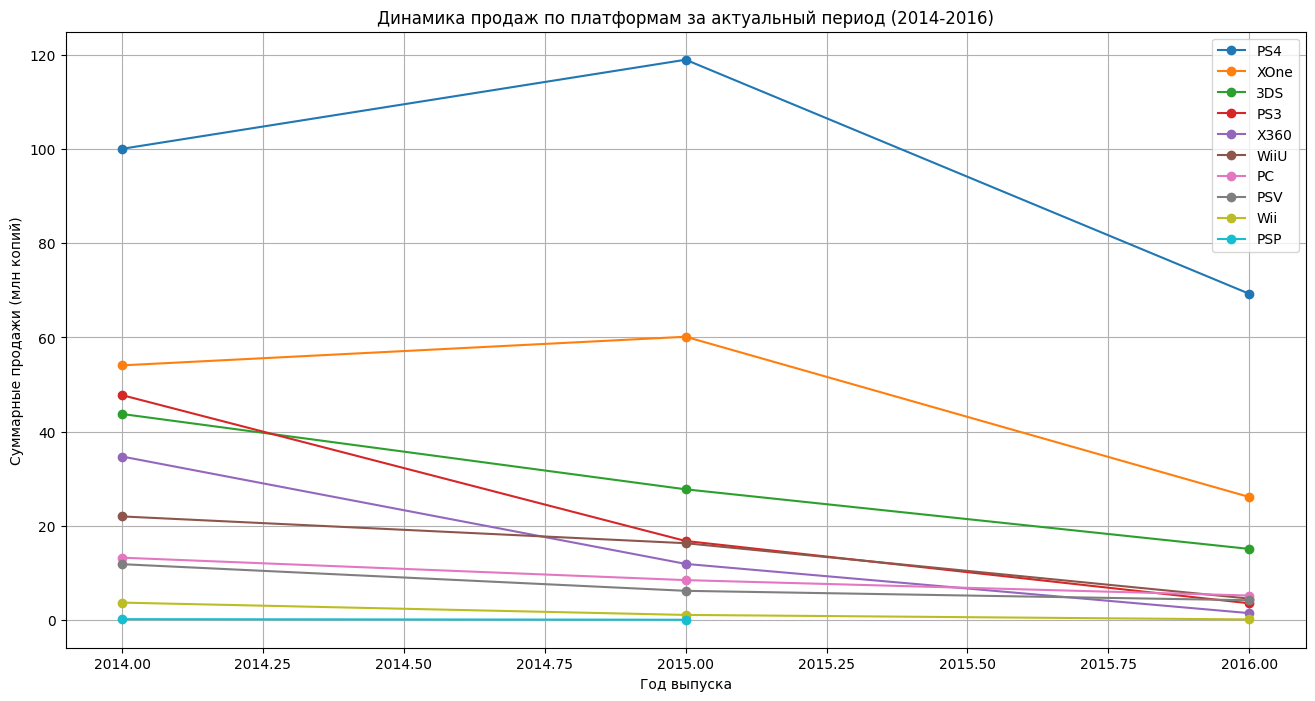

In [17]:
actual_period = games_data[(games_data['year_of_release'] >= 2014) & (games_data['year_of_release'] <= 2016)]

# Шаг 3: Построим график динамики продаж по актуальному периоду
platform_sales = actual_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)

# Отберём топ 10 платформ с самыми высокими продажами
# top_10_platforms = platform_sales.head(10).index

# Построим распределение продаж по годам
plt.figure(figsize=(16,8))
for platform in platform_sales.index:
    sales_per_year = actual_period[actual_period['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, marker='o', label=platform)

plt.title('Динамика продаж по платформам за актуальный период (2014-2016)')
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.legend()
plt.grid(True)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 01</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

**За актуальный период:**

Не смотря на то, что все платформы демонстрируют спад по количеству продаж, выберем 3 лидеров по продажам: PS4, XOne и 3DS, как потенциально прибыльных. 

<font color='Blue'><b>Дополнил.</b></font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Вот, что у нас написано в задании: <br><b>Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.</b> <br>Это необходимо сделать после определения актуального периода.</font>

### Глобальные продажи по платформам

In [18]:
# Построим график "ящик с усами" для топ-10 платформ
# games_data_top_platforms = games_data[games_data['platform'].isin(top_10_platforms)]

# plt.figure(figsize=(16,10))  # Размер графика
# sns.boxplot(x='total_sales', y='platform', data=games_data_top_platforms, order=top_10_platforms)

# plt.title('Глобальные продажи игр по платформам (топ-10)', fontsize=16)
# plt.xlabel('Суммарные продажи (млн копий)', fontsize=12)
# plt.ylabel('Платформа', fontsize=12)
# plt.grid(True)
# plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 К сожалению, на диаграмме размаха видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, задав параметр хlim. Примерно вот так:</font>
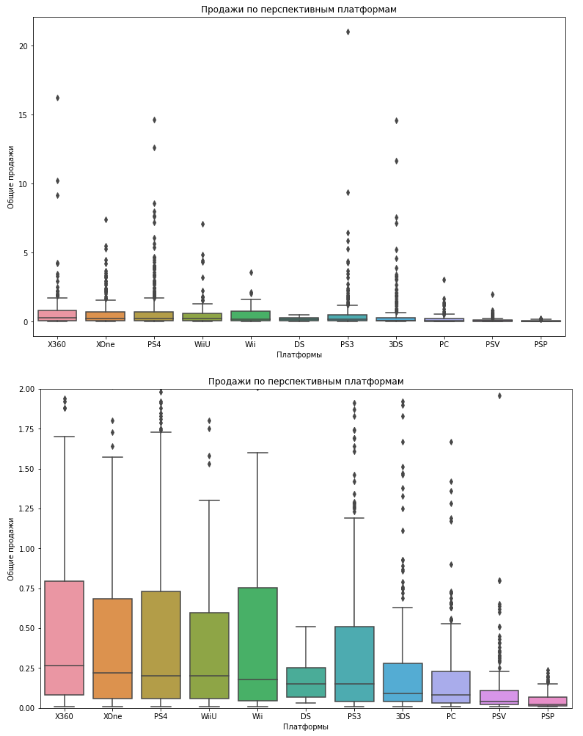

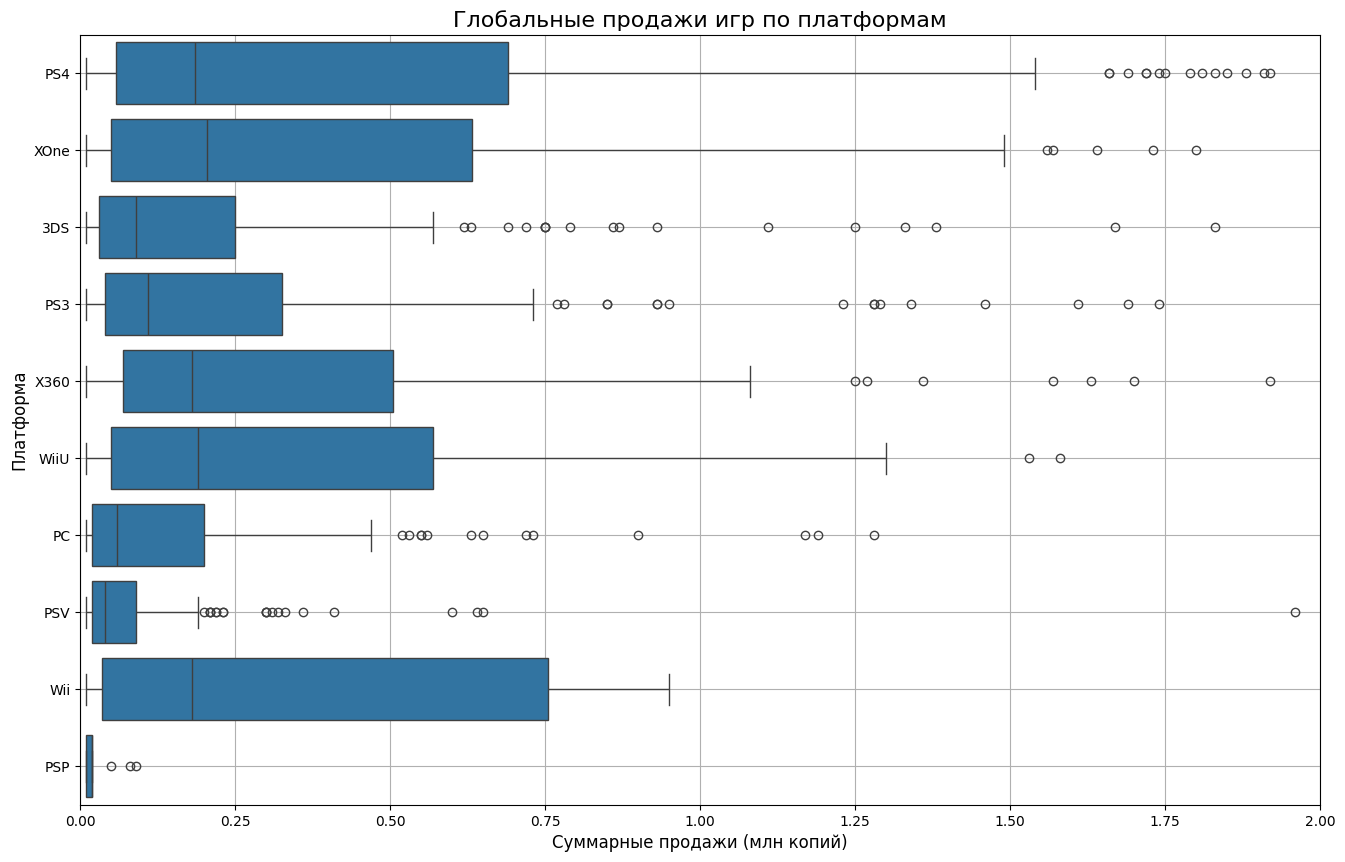

In [19]:
# Размер графика
# plt.figure(figsize=(16,10))  

# # Построим график "ящик с усами" для топ-10 платформ с ограничением по оси X
# sns.boxplot(x='total_sales', y='platform', data=games_data_top_platforms, order=top_10_platforms)

# # Установим предел для оси X, чтобы скрыть выбросы и лучше рассмотреть данные
# plt.xlim(0, 2)  # Предел до 2 млн копий для лучшего отображения медианы и квартилей

# plt.title('Глобальные продажи игр по платформам (топ-10)', fontsize=16)
# plt.xlabel('Суммарные продажи (млн копий)', fontsize=12)
# plt.ylabel('Платформа', fontsize=12)
# plt.grid(True)
# plt.show()

# Построим график "ящик с усами" для платформ за актуальный период
plt.figure(figsize=(16,10))  # Размер графика
sns.boxplot(x='total_sales', y='platform', data=actual_period, order=platform_sales.index)
plt.xlim(0, 2)  # Предел до 2 млн копий для лучшего отображения медианы и квартилей

plt.title('Глобальные продажи игр по платформам', fontsize=16)
plt.xlabel('Суммарные продажи (млн копий)', fontsize=12)
plt.ylabel('Платформа', fontsize=12)
plt.grid(True)
plt.show()

In [20]:
# Выведем таблицу характеристик
platform_statistics = actual_period.groupby('platform')['total_sales'].describe()
display(platform_statistics)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


1. **Распределение продаж**:
   - Платформы с более высокими 75% квантилями, такие как **PS4**, **XOne**, и **WiiU**, указывают на более успешные игры на этих платформах в последние годы.

2. **Выбросы**:
   - На графике видно несколько платформ с выбросами, например, что свидетельствует о наличии бестселлеров с очень высокими продажами.
   - Самые большие выбросы наблюдаются на **PS4** (до 14.63 млн копий), что делает её одной из самых успешных платформ.

3. **Медианные продажи**:
   - Наибольшая медиана наблюдается у **XOne** (0.205 млн копий) и **PS4** (0.185 млн копий), что указывает на более высокую стабильность продаж.
   - Самые низкие медианные продажи у **PSP** и **PSV**, что говорит о низкой популярности игр на этих платформах в последние годы.

**Выводы:**
- **PS4** и **XOne** имеют более высокие медианные продажи и большее количество успешных игр, что подтверждает их статус ведущих платформ.
- Платформы **PSP** и **PSV** показали низкие медианные значения, что указывает на менее стабильные продажи и ограниченный спрос.
- Платформы с большим количеством выбросов (PS4, XOne) имеют больше бестселлеров, которые оказывают существенное влияние на общие показатели продаж.

<font color='DarkBlue'><b>Комментарий ревьюера 01</b></font><br>
<font color='DarkMagenta'>👉 Для интерпретации диаграмм размаха помогает вспомнить, что означают боксплоты. В данном случае расположение боксплота и медианы показывают у какой платформы стабильно высокие продажи. Соответственно, Стримчик должен ориентироваться на такие платформы, так как какая игра в 2017 году выстрелит не известно.</font>
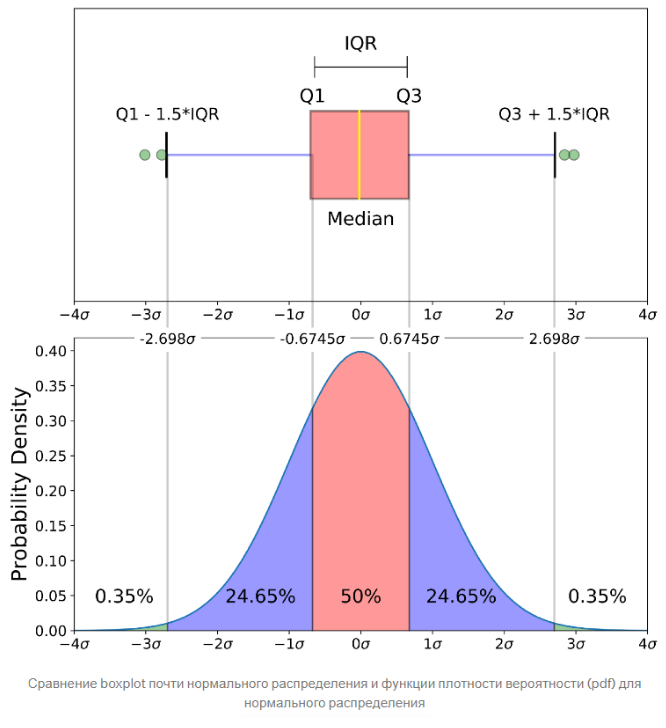

<font color='Blue'><b>Обновил график и выводы.</b></font>

### Влияние на продажи отзывов пользователей и критиков

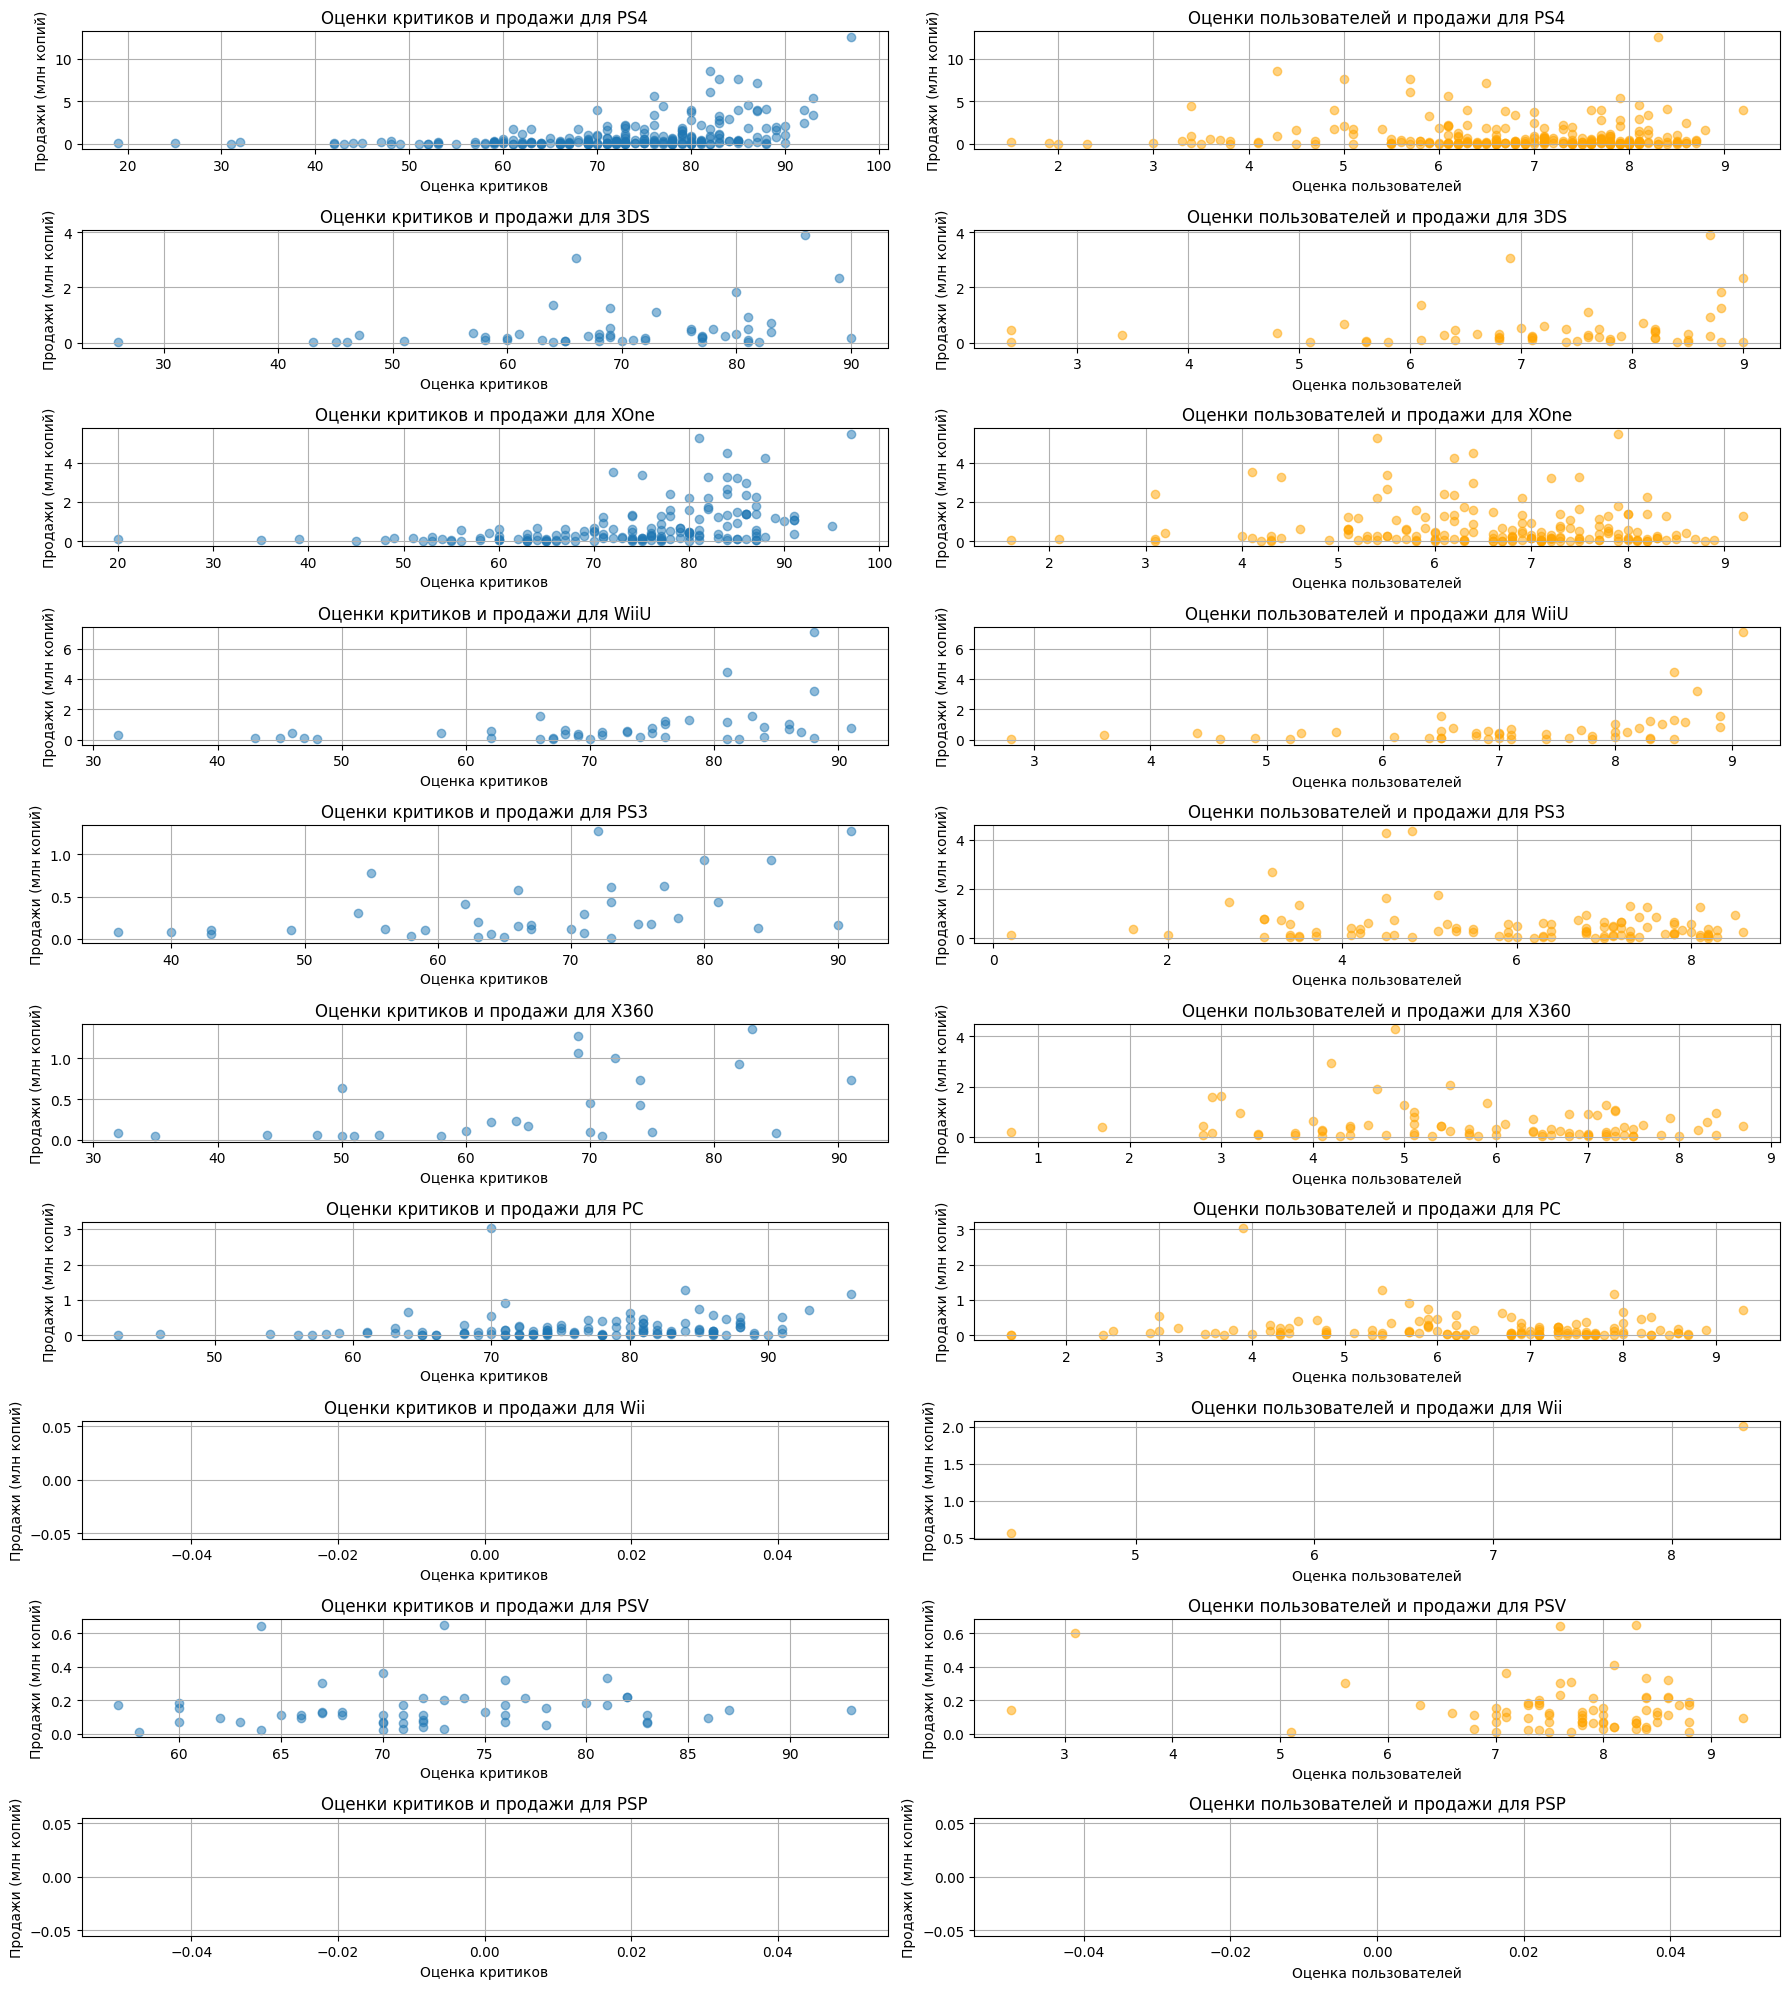

In [21]:
# Получим уникальные платформы за актуальный период
platforms = actual_period['platform'].unique()

# Построим диаграммы рассеяния для всех платформ
plt.figure(figsize=(18, 20))

# Для каждой платформы построим диаграмму рассеяния
for i, platform in enumerate(platforms, 1):
    platform_data = actual_period[actual_period['platform'] == platform]

    # Диаграмма для критиков
    plt.subplot(len(platforms), 2, i*2 - 1)
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5)
    plt.title(f'Оценки критиков и продажи для {platform}')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи (млн копий)')
    plt.grid(True)

    # Диаграмма для пользователей
    plt.subplot(len(platforms), 2, i*2)
    plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5, color='orange')
    plt.title(f'Оценки пользователей и продажи для {platform}')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи (млн копий)')
    plt.grid(True)

plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 01</b></font><br>
<font color='Red'>🛠 Ошибка кода. Вынужден прервать проверку. 😢</font>
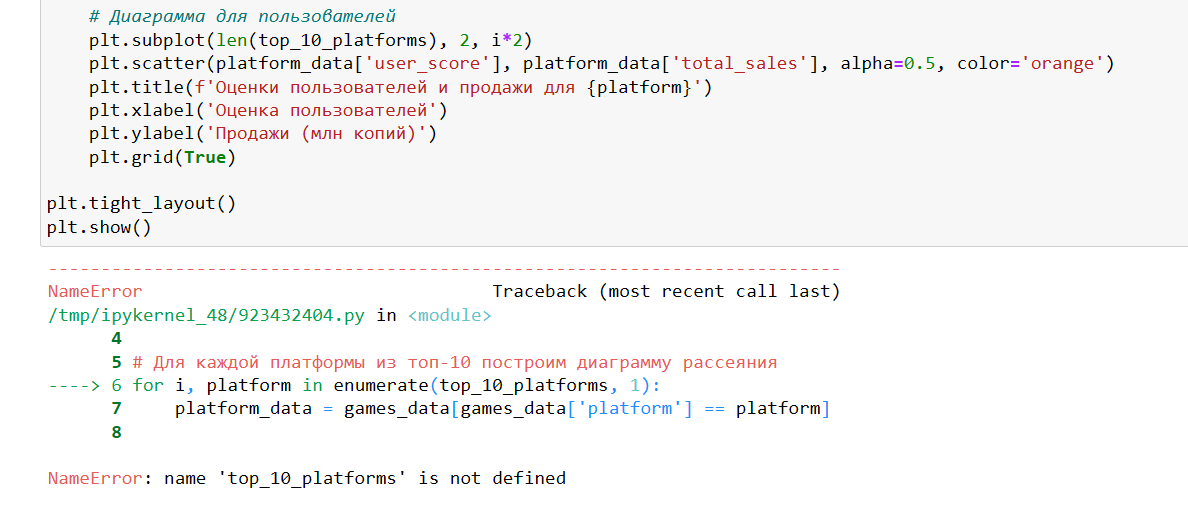

In [22]:
# Рассчитаем корреляции между отзывами критиков, пользователей и продажами для каждой платформы из топ-10
# correlation_results = {}

# for platform in top_10_platforms:
#     platform_data = games_data[games_data['platform'] == platform]
    
#     # Рассчитаем корреляцию для критиков и продаж
#     critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    
#     # Рассчитаем корреляцию для пользователей и продаж
#     user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    
#     # Сохраним результаты
#     correlation_results[platform] = {'critic_corr': critic_corr, 'user_corr': user_corr}

# # Выведем результаты
# display(correlation_results)

# Рассчитаем корреляции между отзывами критиков, пользователей и продажами для каждой платформы
correlation_results = {}

for platform in platforms:
    platform_data = actual_period[actual_period['platform'] == platform]
    
    # Рассчитаем корреляцию для критиков и продаж
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    
    # Рассчитаем корреляцию для пользователей и продаж
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    
    # Сохраним результаты
    correlation_results[platform] = {'critic_corr': critic_corr, 'user_corr': user_corr}

# Выведем результаты
display(correlation_results)

{'PS4': {'critic_corr': np.float64(0.40266141068104083),
  'user_corr': np.float64(-0.040131589472697356)},
 '3DS': {'critic_corr': np.float64(0.314117492869051),
  'user_corr': np.float64(0.2151932718527028)},
 'XOne': {'critic_corr': np.float64(0.42867694370333226),
  'user_corr': np.float64(-0.0703839280647581)},
 'WiiU': {'critic_corr': np.float64(0.370201412480884),
  'user_corr': np.float64(0.40792645792170773)},
 'PS3': {'critic_corr': np.float64(0.44657460493190704),
  'user_corr': np.float64(-0.16676141347662118)},
 'X360': {'critic_corr': np.float64(0.5257228356581523),
  'user_corr': np.float64(-0.138444570945665)},
 'PC': {'critic_corr': np.float64(0.17463413769350036),
  'user_corr': np.float64(-0.07159665703472451)},
 'Wii': {'critic_corr': nan, 'user_corr': np.float64(1.0)},
 'PSV': {'critic_corr': np.float64(0.04266490657009526),
  'user_corr': np.float64(-0.16845504978064446)},
 'PSP': {'critic_corr': nan, 'user_corr': nan}}

**Выводы:**
1. Оценки критиков на всех платформах оказывают умеренное влияние на продажи, с коэффициентами корреляции в диапазоне от 0.18 до 0.43. Это указывает на то, что хорошие оценки критиков в целом положительно влияют на продажи.
2. Оценки пользователей демонстрируют более слабую корреляцию с продажами, варьируясь от 0.11 до 0.22 на большинстве платформ. Это может означать, что пользовательские оценки играют меньшую роль в успехе продаж по сравнению с оценками критиков.
3. Интересно, что на платформе PS4 корреляция с оценками пользователей даже отрицательная (-0.03), что может свидетельствовать о наличии игр, которые пользовались коммерческим успехом несмотря на невысокие оценки пользователей.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Для оценки корреляции лучше пользоваться вот этой шкалой:</font>
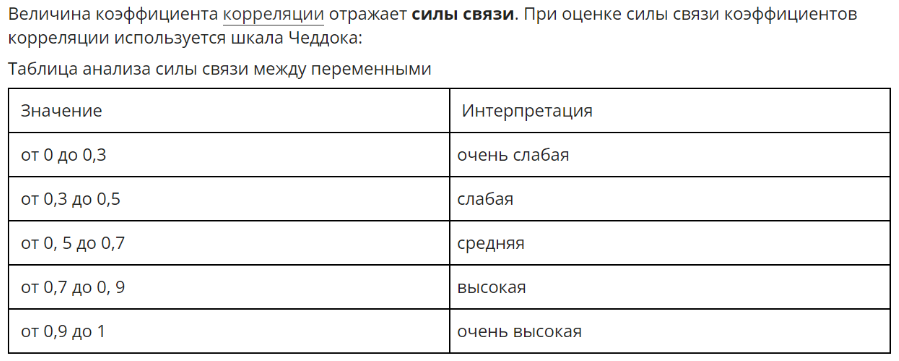

### Продажи игр по жанрам

Суммарные продажи игр по жанрам, млн. копий:


genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

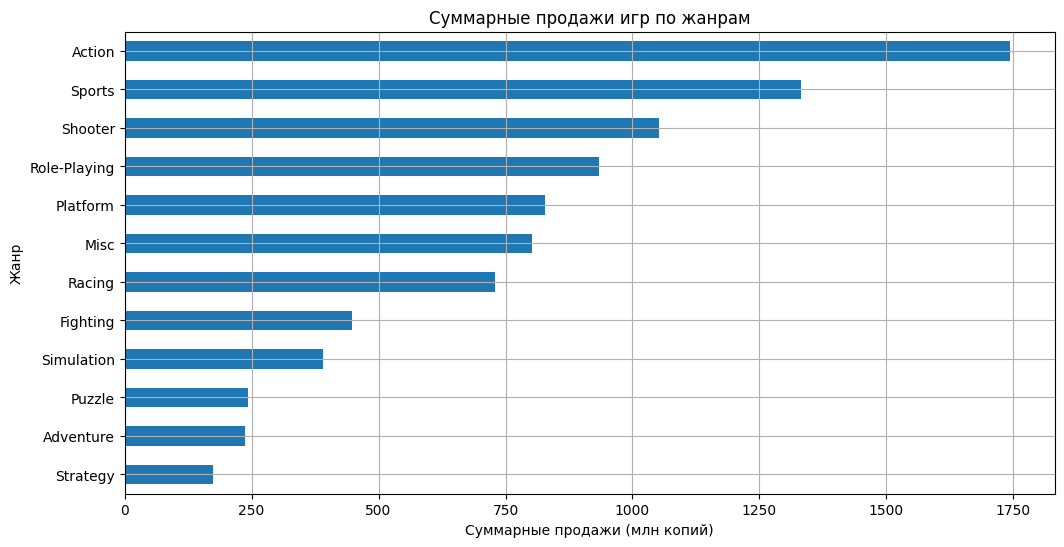

In [23]:
# Рассчитаем суммарные продажи по жанрам
genre_sales = games_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print('Суммарные продажи игр по жанрам, млн. копий:')
display(genre_sales)

# Построим график продаж по жанрам

plt.figure(figsize=(12,6))
genre_sales.sort_values(ascending=True).plot(kind='barh')  # Сортируем от большего к меньшему
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Суммарные продажи (млн копий)')
plt.ylabel('Жанр')
plt.grid(True)
plt.show()

**Самые прибыльные жанры:**
1. Action: Лидирует с продажами в 1526.16 млн копий.
2. Sports: Следом за Action с 1130.92 млн копий.
3. Shooter: Продажи составляют 912.7 млн копий.
Эти жанры явно выделяются как наиболее прибыльные, что связано с их широкой популярностью и большим количеством выпущенных игр.

**Средние продажи:**
1. Role-Playing и Misc: Имеют достаточно высокие продажи — 731.22 и 718.35 млн копий соответственно.
2. Racing и Platform также входят в категорию жанров с заметными продажами.

**Менее прибыльные жанры:**
- Puzzle, Strategy, и Adventure: Эти жанры имеют значительно меньшие продажи, что указывает на их нишевую аудиторию или меньший рынок.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Здесь попали в ловушку, что максимальные продажи являются самыми прибыльными. Но в данных продажи по жанру для разных платформ, и если одна платформа со своей одной игрой в данном жанре выстрелила, а остальные провалились, то все равно будет виден максимум общих продаж. Но для прибыльности нужны стабильные жанры, который приносят доход не зависимо от платформы, значит на этот жанр есть устойчивый спрос.</font><br>
<font color='Red'>🛠 По этому лучше добавить сравнение медианных продаж, проиллюстрировав их диаграммами размаха и изменить промежуточные выводы.</font>

<font color='Blue'><b>Добавил сравнение медианных продаж на диаграммах и обновил выводы ниже.</b></font>

genre
Platform        0.27
Shooter         0.24
Sports          0.22
Fighting        0.21
Action          0.19
Racing          0.19
Role-Playing    0.18
Misc            0.16
Simulation      0.15
Puzzle          0.11
Strategy        0.10
Adventure       0.05
Name: total_sales, dtype: float64

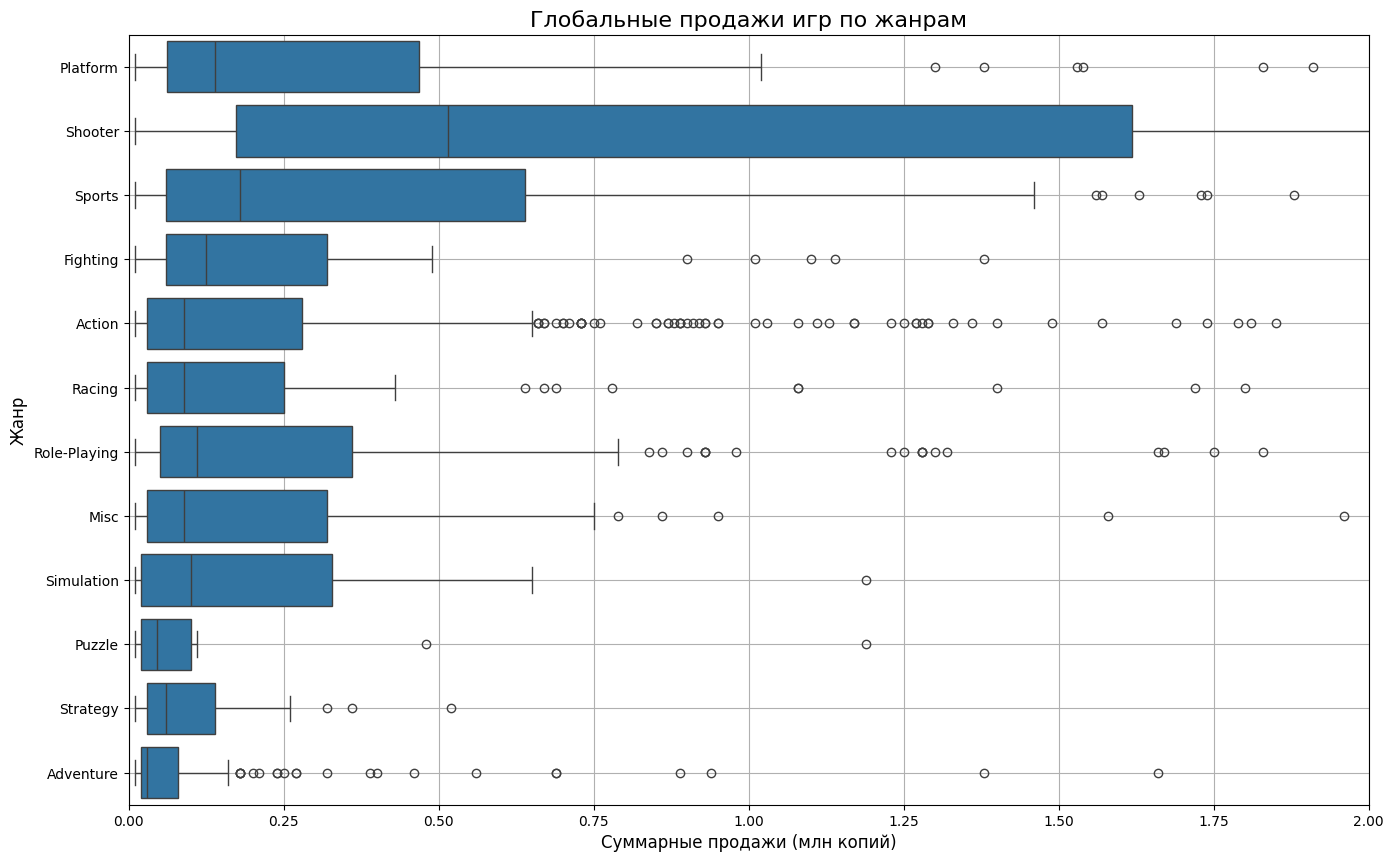

In [24]:
# Рассчитаем медианные продажи по жанрам
genre_median_sales = games_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
display(genre_median_sales)

# Построим распределение игр по жанрам
plt.figure(figsize=(16,10))  # Размер графика
sns.boxplot(x='total_sales', y='genre', data=actual_period, order=genre_median_sales.index)
plt.xlim(0, 2)  # Предел до 2 млн копий для лучшего отображения медианы и квартилей

plt.title('Глобальные продажи игр по жанрам', fontsize=16)
plt.xlabel('Суммарные продажи (млн копий)', fontsize=12)
plt.ylabel('Жанр', fontsize=12)
plt.grid(True)
plt.show()

In [25]:
# Выведем таблицу характеристик
genre_statistics = actual_period.groupby('genre')['total_sales'].describe()
display(genre_statistics)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


1. **Жанры с самыми высокими средними продажами**:
   - **Shooter** лидирует с самой высокой средней продажей (1.34 млн копий), что указывает на популярность этого жанра и наличие большого числа бестселлеров.
   - **Sports** также имеет высокие средние продажи (0.68 млн копий), благодаря широкому охвату аудитории.
   - **Fighting** и **Platform** занимают средние позиции по продажам (около 0.47 млн копий), что указывает на стабильный интерес к этим жанрам.

2. **Медианные продажи**:
   - **Shooter** выделяется как по средней, так и по медианной продаже (0.515 млн копий), что указывает на стабильный спрос на игры в этом жанре.
   - **Sports** также показывает высокую медианную продажу (0.18 млн копий), что свидетельствует о том, что значительная часть игр в жанре спортивных игр пользуется спросом.
   - **Adventure** и **Strategy** имеют самые низкие медианные продажи (0.03 и 0.06 млн копий соответственно), что говорит о меньшей популярности этих жанров.

3. **Разброс продаж и наличие выбросов**:
   - Жанры с наибольшим стандартным отклонением, такие как **Shooter** (2.05 млн копий) и **Role-Playing** (1.18 млн копий), демонстрируют высокий разброс продаж. Это указывает на наличие как бестселлеров, так и игр, которые продаются хуже.
   - **Platform** и **Fighting** также имеют значительный разброс, что свидетельствует о популярности некоторых игр, но нестабильности спроса в целом.

4. **Менее прибыльные жанры**:
   - **Adventure**, **Strategy**, и **Puzzle** демонстрируют самые низкие средние и медианные продажи, что указывает на ограниченный спрос. Эти жанры часто имеют нишевую аудиторию и реже становятся коммерчески успешными.

**Выводы:**
- **Shooter и Sports** — это жанры, которые демонстрируют стабильные высокие продажи, делая их наиболее прибыльными и востребованными.
- **Жанры с более низкими медианными продажами** (например, **Adventure** и **Strategy**) показывают меньший спрос и чаще обращаются к нишевой аудитории.
- Разброс продаж в некоторых жанрах, таких как **Shooter** и **Role-Playing**, указывает на присутствие как успешных игр-бестселлеров, так и менее популярных проектов.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 В проекте под "прибыльностью" понимается наличие устойчивого спроса пользователей на данный жанр. Можно сделать уникальный сюжет, быстрый движок, красивую графику и вложить немеряно денег в рекламу и продажи игры подпрыгнут. Но нам лучше выбирать игру из жанра, на которой есть постоянный спрос независимо от маркетинговых усилий производителей игр.<br>
Это хороший пример, когда на одних и тех же данных разные диаграммы дают разный анализ. Визуализация это не только красивое представление табличных данных, а еще и инструмент анализа.</font>

## Анализ пользователей по регионам

In [26]:
# Определим топ-5 популярных платформ в каждом регионе (NA, EU, JP)
na_top_platforms = games_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_platforms = games_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_platforms = games_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Определим топ-5 популярных жанров в каждом регионе (NA, EU, JP)
na_top_genres = games_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_top_genres = games_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_top_genres = games_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Анализ влияния рейтинга ESRB на продажи в каждом регионе
esrb_na_sales = games_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu_sales = games_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp_sales = games_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Вывод результатов
print("Топ-5 платформ в Северной Америке:")
print(na_top_platforms)
print("\nТоп-5 жанров в Северной Америке:")
print(na_top_genres)
print("\nВлияние рейтинга ESRB на продажи в Северной Америке:")
print(esrb_na_sales)

print("\nТоп-5 платформ в Европе:")
print(eu_top_platforms)
print("\nТоп-5 жанров в Европе:")
print(eu_top_genres)
print("\nВлияние рейтинга ESRB на продажи в Европе:")
print(esrb_eu_sales)

print("\nТоп-5 платформ в Японии:")
print(jp_top_platforms)
print("\nТоп-5 жанров в Японии:")
print(jp_top_genres)
print("\nВлияние рейтинга ESRB на продажи в Японии:")
print(esrb_jp_sales)

Топ-5 платформ в Северной Америке:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Топ-5 жанров в Северной Америке:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Влияние рейтинга ESRB на продажи в Северной Америке:
rating
E            1292.99
No Rating    1242.46
T             759.75
M             748.48
E10+          353.32
K-A             2.56
EC              1.53
AO              1.26
RP              0.00
Name: na_sales, dtype: float64

Топ-5 платформ в Европе:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Топ-5 жанров в Европе:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Влияние рейтинга ESRB на продажи в Европе:
rating
E            710.25
No Rating    613.83
M            483.97


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Любой анализ данных требует визуализации его результатов. Табличные данные не всегда информативны. Здесь этого не сделано. Лучше сделать круговые диаграммы, а данные не вошедшие в ТОП просуммировать и вывести отдельной группой "Другие", и по платформам, и по жанрам. Тогда на такой диаграмме хорошо видны все региональные рынки игр с разбиением на платформы/жанры. Какая платформа/жанр занимает какую долю рынка. И наша визуализация несет определенную бизнес-логику, связанную именно с долями рынка занимаемыми платформами/жанрами. А этого не дают другие виды диаграмм. Примерно вот так:</font>
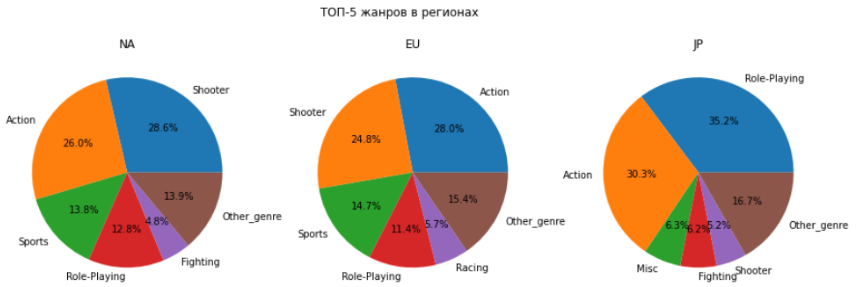

**Северная Америка (NA)**:
- **Топ-5 популярных платформ**:
  1. X360 (595.74 млн копий)
  2. PS2 (572.92 млн копий)
  3. Wii (486.87 млн копий)
  4. PS3 (390.13 млн копий)
  5. DS (380.31 млн копий)
  
  
- **Топ-5 популярных жанров**:
  1. Action (752.27 млн копий)
  2. Sports (589.39 млн копий)
  3. Shooter (495.23 млн копий)
  4. Misc (365.27 млн копий)
  5. Role-Playing (282.30 млн копий)


- **Влияние рейтинга ESRB на продажи**:

  - Наибольшие продажи у игр с рейтингом **E (Everyone)** — 1249.26 млн копий.
  - Игры с рейтингом **M (Mature)** и **T (Teen)** также популярны, но продажи ниже (727.8 млн и 709.86 млн копий соответственно).

**Европа (EU)**:

- **Топ-5 популярных платформ**:
  1. PS2 (332.63 млн копий)
  2. PS3 (327.21 млн копий)
  3. X360 (268.32 млн копий)
  4. Wii (258.32 млн копий)
  5. DS (188.41 млн копий)


- **Топ-5 популярных жанров**:
  1. Action (466.58 млн копий)
  2. Sports (339.58 млн копий)
  3. Shooter (294.02 млн копий)
  4. Misc (196.71 млн копий)
  5. Racing (192.02 млн копий)


- **Влияние рейтинга ESRB на продажи**:
  - Игры с рейтингом **E** также лидируют в Европе — 690.61 млн копий.
  - Продажи игр с рейтингом **M** (472.4 млн копий) и **T** (392.71 млн копий) несколько ниже, чем в Северной Америке.

**Япония (JP)**:

- **Топ-5 популярных платформ**:
  1. DS (175.00 млн копий)
  2. PS2 (137.54 млн копий)
  3. 3DS (100.62 млн копий)
  4. PS3 (79.41 млн копий)
  5. PSP (75.88 млн копий)


- **Топ-5 популярных жанров**:
  1. Role-Playing (241.71 млн копий)
  2. Action (132.23 млн копий)
  3. Misc (85.43 млн копий)
  4. Sports (75.88 млн копий)
  5. Platform (55.27 млн копий)


- **Влияние рейтинга ESRB на продажи**:
  - В Японии продажи игр с рейтингом **E** составляют 189.91 млн копий, но значительная доля также у игр с рейтингом **T (Teen)** — 131.01 млн копий.
  - Игры с рейтингом **M (Mature)** значительно менее популярны (57.84 млн копий), чем в Северной Америке и Европе.

**Выводы:**
- **Популярность платформ**: В Северной Америке и Европе популярны консоли X360, PS2, и Wii, тогда как в Японии большую долю занимают портативные устройства, такие как DS и PSP.
- **Различие жанров**: В Северной Америке и Европе лидируют Action и Sports, в то время как в Японии самым популярным жанром является Role-Playing.
- **Рейтинг ESRB**: В Северной Америке и Европе игры с рейтингом **E** (Everyone) лидируют по продажам, но в Японии также высокие продажи у игр с рейтингом **T** (Teen).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При предобработке данных не была поставлена заглушка на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
<font color='DarkMagenta'>👉 А проблема в том, что если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И это необходимо учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [27]:
# Комментарий ревьюера
temp = games_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


rating
No Rating    6765
E            3989
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: count, dtype: int64

<font color='Blue'><b>Дополнил анализ ниже.</b></font>

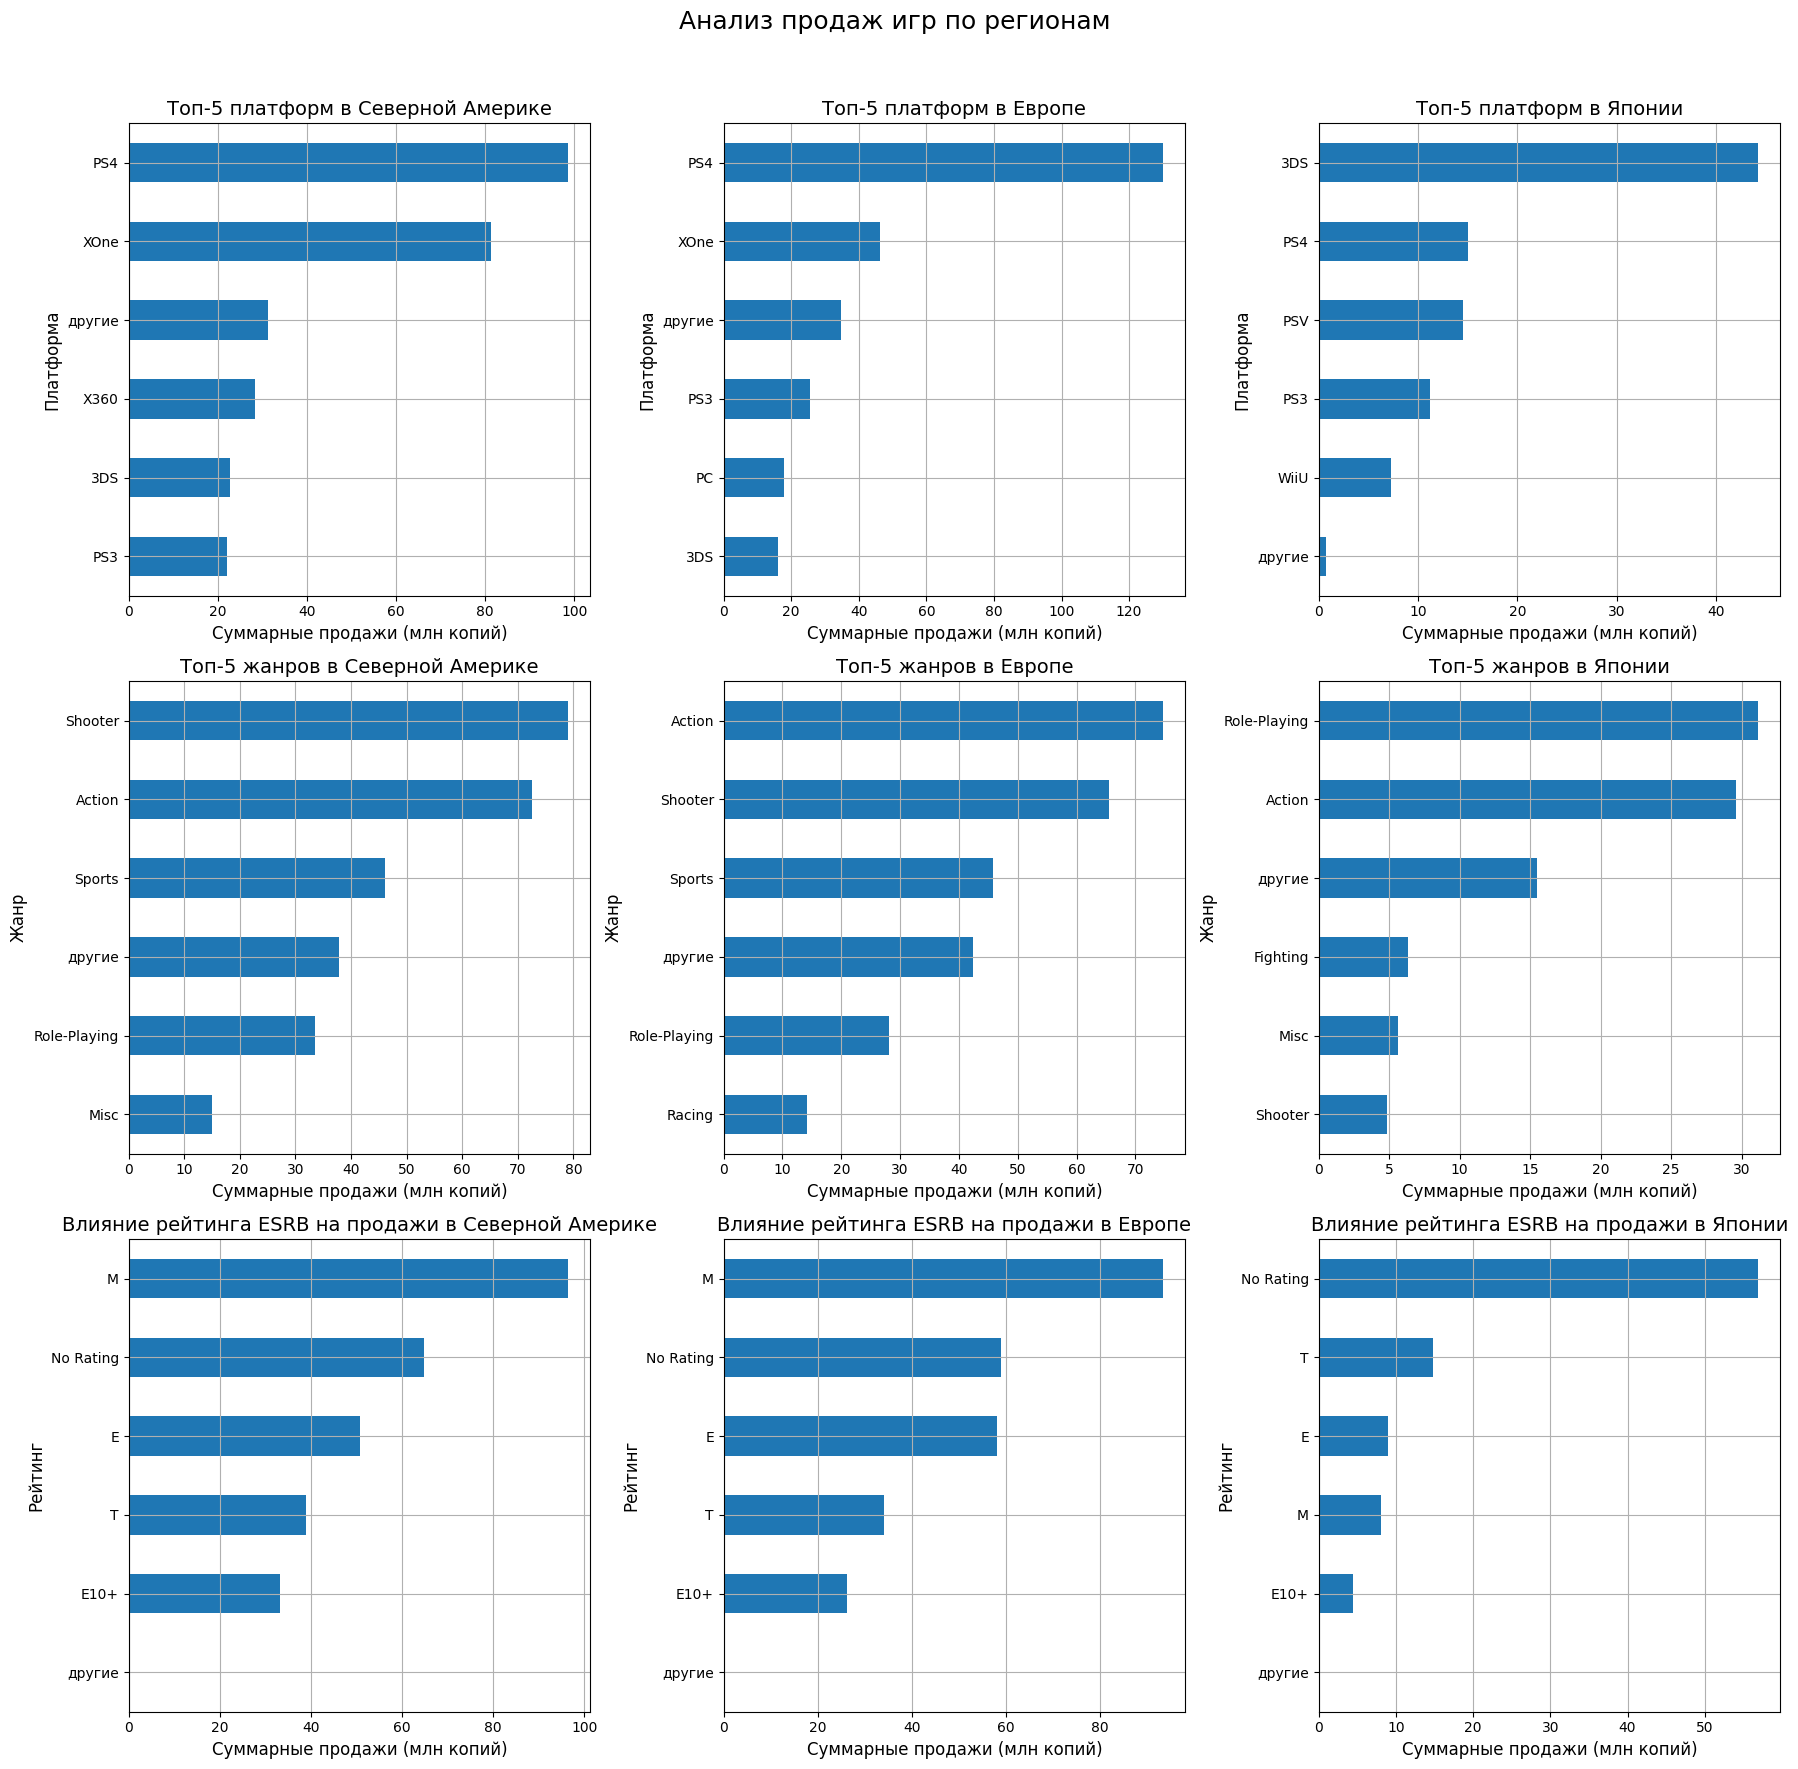

In [28]:
# Функция для создания горизонтальной гистограммы с добавлением категории "Другие"
def plot_bar_with_others(ax, data, title, xlabel, ylabel, top_n=5):
    # Считаем сумму для категории "Другие"
    other_sales = data.iloc[top_n:].sum()
    top_data = data.iloc[:top_n].copy()
    top_data['другие'] = other_sales

    # Построим график
    top_data.sort_values(ascending=True).plot(kind='barh', ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True)

# Создадим фигуру с 3x3 графиками для анализа по регионам
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Анализ продаж игр по регионам', fontsize=18)

# 1. Топ-5 платформ по регионам с добавлением категории "Другие"
plot_bar_with_others(axes[0, 0], actual_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 платформ в Северной Америке', 'Суммарные продажи (млн копий)', 'Платформа')
plot_bar_with_others(axes[0, 1], actual_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 платформ в Европе', 'Суммарные продажи (млн копий)', 'Платформа')
plot_bar_with_others(axes[0, 2], actual_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 платформ в Японии', 'Суммарные продажи (млн копий)', 'Платформа')

# 2. Топ-5 жанров по регионам с добавлением категории "Другие"
plot_bar_with_others(axes[1, 0], actual_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 жанров в Северной Америке', 'Суммарные продажи (млн копий)', 'Жанр')
plot_bar_with_others(axes[1, 1], actual_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 жанров в Европе', 'Суммарные продажи (млн копий)', 'Жанр')
plot_bar_with_others(axes[1, 2], actual_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False), 
                     'Топ-5 жанров в Японии', 'Суммарные продажи (млн копий)', 'Жанр')

# 3. Влияние рейтинга ESRB на продажи по регионам с добавлением категории "Другие"
plot_bar_with_others(axes[2, 0], actual_period.groupby('rating')['na_sales'].sum().sort_values(ascending=False), 
                     'Влияние рейтинга ESRB на продажи в Северной Америке', 'Суммарные продажи (млн копий)', 'Рейтинг')
plot_bar_with_others(axes[2, 1], actual_period.groupby('rating')['eu_sales'].sum().sort_values(ascending=False), 
                     'Влияние рейтинга ESRB на продажи в Европе', 'Суммарные продажи (млн копий)', 'Рейтинг')
plot_bar_with_others(axes[2, 2], actual_period.groupby('rating')['jp_sales'].sum().sort_values(ascending=False), 
                     'Влияние рейтинга ESRB на продажи в Японии', 'Суммарные продажи (млн копий)', 'Рейтинг')

# Настроим расположение графиков
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1. Самые популярные платформы (топ-5) и различия в долях продаж:**

**Северная Америка (NA):**
- Лидирующими платформами являются PS4 и Xbox One, которые занимают существенные доли рынка.
- Платформы предыдущего поколения (X360, PS3) имеют значительно меньшие продажи, но все еще остаются в топе.
- Портативные устройства, такие как 3DS, занимают сравнительно небольшую долю, однако их продажи выше, чем у платформ, объединенных в категорию "Другие".

**Европа (EU):**
- В Европе PS4 доминирует еще сильнее, что связано с более выраженной популярностью этой платформы.
- Присутствие PC в топ-5 указывает на более значимую роль компьютерных игр в Европе по сравнению с Северной Америкой и Японией.
- 3DS также входит в топ, но с более низкими продажами, чем в Северной Америке.

**Япония (JP):**
- В Японии доминируют портативные консоль 3DS, что отражает предпочтения японских пользователей к играм на ходу.
- Стационарные консоли, такие как PS4 и PS3, занимают второстепенные позиции.
- Платформы из категории "Другие" занимают совсем небольшую долю, что подчеркивает узкую специализацию рынка.

**2. Самые популярные жанры (топ-5) и различия в предпочтениях:**

**Северная Америка (NA):**
- Стрелялки (Shooter) и экшен (Action) — самые популярные жанры, указывающие на предпочтение игр с динамичным геймплеем.
- Спортивные игры занимают третье место, что также характерно для американского рынка.
- Жанры вроде "Role-Playing" и "Misc" занимают меньшие доли, но все еще являются значимыми.

**Европа (EU):**
- Лидируют жанры экшен и стрелялки, как и в Северной Америке, но доли продаж здесь более равномерно распределены.
- Спортивные игры также занимают высокую позицию, что отражает популярность спортивных симуляторов в Европе.
- Жанры, такие как "Racing", также пользуются популярностью в Европе, чего не наблюдается в Северной Америке.

**Япония (JP):**
- Лидирующим жанром является "Role-Playing", что связано с культурными особенностями и предпочтением JRPG.
- Экшен-игры также популярны, но занимают второе место.
- Жанры вроде "Fighting" и "Misc" играют более значительную роль, чем в других регионах.

**3. Влияние рейтинга ESRB на продажи в различных регионах:**

**Северная Америка (NA):**
- Игры с рейтингом "M" (Mature) занимают наибольшую долю, что отражает популярность игр для взрослой аудитории.
- Отсутствие рейтинга ("No Rating") также оказывает значительное влияние на рынок, что может указывать на инди-игры или игры, не предназначенные для массового выпуска.

**Европа (EU):**
- Рейтинг "M" также доминирует, однако доли других категорий (E, T, E10+) более равномерно распределены по сравнению с Северной Америкой.
- Отсутствие рейтинга оказывает меньшее влияние, чем в Северной Америке.

**Япония (JP):**
- В Японии игры без рейтинга ("No Rating") занимают основную долю, что объясняется отсутствием обязательности рейтинга ESRB в регионе.
- Рейтинг "T" (Teen) имеет более значительную долю, чем "M", что свидетельствует о популярности игр для подростковой аудитории.

**Выводы:**
- Наибольшие различия в региональных предпочтениях наблюдаются в выборе платформ и жанров, что связано с культурными особенностями.
- Влияние рейтинга ESRB на продажи также варьируется: в Северной Америке и Европе популярны игры с рейтингом "M", тогда как в Японии значительную долю занимают игры без рейтинга.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данных и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

## Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- **Нулевая гипотеза (H0):** Средние пользовательские рейтинги Xbox One и PC одинаковые.

- **Альтернативная гипотеза (H1):** Средние пользовательские рейтинги Xbox One и PC разные.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

In [29]:
# Выбираем данные для Xbox One и PC
xbox_one_ratings = games_data[games_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = games_data[games_data['platform'] == 'PC']['user_score'].dropna()

# Применяем критерий Стьюдента для независимых выборок
alpha = 0.01  # пороговое значение
t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)

if p_value < alpha:
    print(f"Гипотеза отвергается: p-value = {p_value:.5f}")
else:
    print(f"Гипотеза не отвергается: p-value = {p_value:.5f}")

Гипотеза отвергается: p-value = 0.00001


<font color='Blue'><b>Дополнил расчёт средних ниже.</b></font>

In [30]:
# Рассчитываем средние значения
mean_xbox_one = xbox_one_ratings.mean()
mean_pc = pc_ratings.mean()

print(f"Средний пользовательский рейтинг Xbox One: {mean_xbox_one:.2f}")
print(f"Средний пользовательский рейтинг PC: {mean_pc:.2f}")

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 7.06


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что отфильтровали пропуски. 👍</font><br>
<font color='DarkGreen'>👌 Правильно, что для тестирования гипотез использован двусторонний t-тест.</font>

Поскольку p-value значительно меньше порогового значения alpha = 0.01, мы отвергаем нулевую гипотезу и можем утверждать, что средние пользовательские рейтинги Xbox One и PC различаются.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

- **Нулевая гипотеза (H0):** Средние пользовательские рейтинги жанров Action и Sports одинаковые.

- **Альтернативная гипотеза (H1):** Средние пользовательские рейтинги жанров Action и Sports разные.

In [31]:
# Выбираем данные для Action и Sports
action_ratings = games_data[games_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = games_data[games_data['genre'] == 'Sports']['user_score'].dropna()

# Применяем критерий Стьюдента для независимых выборок
t_stat_genres, p_value_genres = stats.ttest_ind(action_ratings, sports_ratings)

if p_value_genres < alpha:
    print(f"Гипотеза отвергается: p-value = {p_value_genres:.5f}")
else:
    print(f"Гипотеза не отвергается: p-value = {p_value_genres:.5f}")
    
# Рассчитываем средние значения
mean_action = action_ratings.mean()
mean_sports = sports_ratings.mean()

print(f"Средний пользовательский рейтинг жанра Action: {mean_action:.2f}")
print(f"Средний пользовательский рейтинг жанра Sports: {mean_sports:.2f}")

Гипотеза не отвергается: p-value = 0.10921
Средний пользовательский рейтинг жанра Action: 7.05
Средний пользовательский рейтинг жанра Sports: 6.96


Поскольку p-value больше порогового значения alpha = 0.01, мы не можем отвергнуть нулевую гипотезу. 

Это означает, что нет достаточных доказательств того, что средние пользовательские рейтинги жанров Action и Sports различаются.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Лучше было написать, что на имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.</font>

**Критерий:** Для проверки гипотез был использован t-тест для независимых выборок (критерий Стьюдента), так как мы сравниваем средние значения для двух независимых групп.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильным показать дополнительно средние пользовательские рейтинги и по платформам, и по жанрам, как иллюстрации не противоречивости наших гипотез, используя метод `.mean()`.</font><br>
<font color='Red'>🛠 Необходимо сделать выводы по данному разделу согласно заданию:<br>
<b>Поясните:<br>
Как вы сформулировали нулевую и альтернативную гипотезы.</b><br>
То есть, необходимо описать принцип формулирования нулевой и альтернативной гипотез.</font>

<font color='Blue'><b>Дополнил ниже.</b></font>

**Принцип формулирования гипотез:**

1. Нулевая гипотеза всегда утверждает, что между сравниваемыми группами нет значимых различий (одинаковые средние значения). Это используется для проверки предположения об отсутствии различий в пользовательских рейтингах.
2. Альтернативная гипотеза, напротив, указывает на наличие различий (разные средние значения). Она проверяется путем оценки статистической значимости результата.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Вспоминаем спринт по Статистике.<br>
<p>    <b>Правила формулирования нулевой и альтернативной гипотез:</b><br>
- <i>Нулевая гипотеза (H0)</i> - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.<br>
- <i>Альтернативная гипотеза (H1)</i> - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.</p>
<p><b>Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:</b><br>
- <i>Нормальное распределение данных:</i> t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.<br>
- <i>Равномерное распределение данных в каждой группе:</i> t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.<br>
- <i>Независимость выборок:</i> t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.<br>
- <i>Достаточно большой размер выборки:</i> для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.<br> 
- <i>Отсутствие выбросов:</i> t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.<br>
- <i>Однородность дисперсий:</i> t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.</p></font>

## Общий вывод

В ходе проекта был выполнен анализ данных по продажам компьютерных игр для интернет-магазина "Стримчик". Были проанализированы платформы, жанры и региональные предпочтения пользователей для прогнозирования успешности игр и планирования рекламных кампаний.

**Основные выводы:**

1. **Динамика продаж и платформы**:
   - Продажи игр имеют волнообразный характер с пиками в 2000-х годах и снижением к 2010-м.
   - Платформы имеют характерный жизненный цикл 5-10 лет. Лидирующими платформами по продажам были PS2, Wii, и X360. Новые платформы, такие как PS4, продолжают демонстрировать рост.

2. **Жанры**:
   - Самыми прибыльными жанрами оказались Action, Sports и Shooter. Они занимают первые места по продажам.
   - Жанры Role-Playing и Misc также имеют значительные продажи, а менее прибыльные жанры, такие как Puzzle и Strategy, имеют нишевую аудиторию.

3. **Региональные различия**:
   - В Северной Америке и Европе доминируют консоли (X360, PS2), тогда как в Японии более популярны портативные устройства (DS, PSP).
   - Жанровые предпочтения различаются: в Северной Америке и Европе доминируют Action и Sports, а в Японии — Role-Playing.
   - Рейтинг ESRB существенно влияет на продажи: в Северной Америке и Европе лидируют игры с рейтингом **E (Everyone)**, а в Японии популярны также игры с рейтингом **T (Teen)**.

4. **Проверка гипотез**:
   - Было проверено две гипотезы:
     - Средние пользовательские рейтинги платформ Xbox One и PC **различаются** (p-value < 0.01).
     - Средние пользовательские рейтинги жанров Action и Sports **одинаковы** (p-value > 0.05).

**Рекомендации:**
Для успешного планирования рекламных кампаний следует ориентироваться на прибыльные жанры (Action, Sports, Shooter) и учитывать региональные различия в предпочтениях платформ и жанров.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Общий вывод относится ко всему проекту.<br>Он должен содержать развернутое резюме по всем разделам проекта: описание данных, порядок обработки аномалий, пропусков и дубликатов, предобработка данных для анализа и все этапы исследовательского анализа.</font><br>
<font color='DarkMagenta'>👉 Цель исследования понять, на что потратить рекламный бюджет. В исследовании проанализированы игры с разных сторон. Логично, что рекламный отдел ждет информации на какие платформы (2-3 штуки), с каким жанром, с каким рейтингом ESRB и в каком регионе рекламировать. Стоит ли обращать внимание на отзывы или нет. <br>Вся информация в проекте для этого уже есть.</font>

<font color='Blue'><b>Обновил.</b></font>

**Общий вывод**

В рамках проекта был проведен комплексный анализ данных о продажах компьютерных игр для интернет-магазина "Стримчик". Основная цель состояла в выявлении закономерностей, влияющих на успешность игр, для планирования рекламных кампаний в 2017 году. Были проанализированы данные о платформах, жанрах и региональных предпочтениях, а также проверены гипотезы, связанные с пользовательскими оценками.

**1. Описание данных и подготовка**
- **Описание данных:** В датасете содержатся данные о продажах, годах выпуска, оценках критиков и пользователей, а также возрастных рейтингах ESRB для различных игр.
- **Предобработка данных:** 
  - Столбцы были приведены к нижнему регистру, значения в "user_score" и "year_of_release" преобразованы к числовому типу.
  - Были обработаны пропуски, в том числе добавлен "No Rating" для игр без рейтинга ESRB.
  - Аномалии в данных (дубликаты и некорректные значения) были обработаны.

**2. Исследовательский анализ данных**
- **Динамика продаж:** Продажи игр имеют волнообразный характер, достигая пика в 2000-х и снижения в 2010-х годах.
- **Платформы:** Средний жизненный цикл платформ составляет около 7 лет. Лидерами по продажам в последние годы стали PS4 и Xbox One. Для актуального периода 2014-2016 годов были выбраны PS4, Xbox One и 3DS как наиболее прибыльные платформы.
- **Жанры:** Самыми прибыльными жанрами являются Shooter, Action и Sports. Жанры с наибольшими средними продажами (Shooter, Sports) имеют стабильный спрос, в то время как жанры Puzzle и Strategy остаются нишевыми.
- **Региональные предпочтения:** 
  - В Северной Америке и Европе доминируют стационарные консоли (PS4, Xbox One), в то время как в Японии более популярны портативные устройства (3DS, PSV).
  - Жанровые предпочтения различаются: в Северной Америке и Европе популярны Shooter и Action, тогда как в Японии доминируют игры жанра Role-Playing.

**3. Проверка гипотез**
- **Гипотеза о средних пользовательских рейтингах Xbox One и PC:** Средние оценки различаются (p-value < 0.01), что свидетельствует о том, что пользователи по-разному воспринимают игры на этих платформах.
- **Гипотеза о средних пользовательских рейтингах жанров Action и Sports:** Не выявлено значимых различий (p-value > 0.05), что указывает на схожесть восприятия этих жанров.

**4. Рекомендации для рекламных кампаний**
- **Платформы:** Рекомендуется направить бюджет на рекламу игр для PS4 и Xbox One в Северной Америке и Европе, а также для 3DS в Японии.
- **Жанры:** Основной фокус стоит сделать на популярные жанры Shooter, Action и Sports, которые демонстрируют стабильные продажи.
- **Рейтинги ESRB:** Учитывать влияние рейтинга на продажи — рекламировать игры с рейтингом "M" в Северной Америке и Европе, а в Японии также обратить внимание на игры без рейтинга ESRB.
- **Оценки критиков:** Положительные оценки критиков оказывают более значительное влияние на продажи, чем пользовательские рейтинги, поэтому стоит уделить внимание привлечению рецензентов.

Итоговый анализ позволяет предложить подход к эффективному распределению рекламного бюджета с учетом предпочтений различных регионов и особенностей платформ и жанров.

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Николай, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Сделать проверку явных и неявных дубликатов. Определить актуальный период и дальнейшие исследования проводить только за этот период. Выбрать несколько потенциально прибыльных платформ актуального периода. Переделать построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. В анализе игр по жанрам надо проанализировать медианные значения продаж, построив диаграммы размаха. Необходимо сделать пояснения по разделу гипотез согласно заданию. Написать развернутый общий вывод исследования.<br>Обращаю внимание, что после исправления ошибок необходимо будет откорректировать выводы анализа.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 01</b></font><br>
<font color='DarkGreen'>👌 Николай!<br></font>
<font color='Red'>🛠 Увы, должен прервать ревью из-за ошибки в коде. Настоятельно рекомендую перед отправкой проекта на ревью проверять в JupyterHub исполнение кода тетрадки.<br>
Жду исправленный проект. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Николай! Удалось справиться со всеми подводными камнями в проекте.  Молодец! 😄<br>
Входе выполнения проекта узнали, что не все пропуски просто ошибки сбора данных, а несут свои признаки. Для этого понадобилось за данными датасета увидеть смысл этих данных и бизнес-процессы, которые за ними скрываются. Узнали, что медианы могут дать дополнительную информацию при анализе. Это новые знания и навыки, которые пригодятся в будущем!<br></font>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
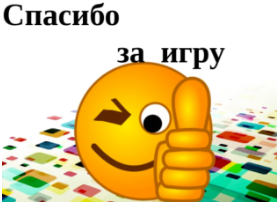